# Example 1

Compute $RSR_{NL-L}$ which is defined by the ratio of nonlinear and linear transfer functions for within and outcrop motions. This example is not the best illustration of the capabilities, but was the first that was created while I was reviewing a paper.

Load required modules including `pysra`.

In [1]:
import collections
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import pysra

%matplotlib inline

Initialize a motion. In this example, we are using an empty motion for calculation of the transfer function only.

In [2]:
motion = pysra.motion.Motion(np.logspace(-1, 2, 301))

Initialize two profiles consisting as two layers (Soil and Rock). The two profiles are representative of small-strain and strain-compatible profiles.

In [3]:
profiles = [
    # Initial
    pysra.site.Profile([
        pysra.site.Layer(
            pysra.site.SoilType(
                'Soil', 18., None, 0.05
            ),
            30, 400
        ),
        pysra.site.Layer(
            pysra.site.SoilType(
                'Rock', 24., None, 0.01
            ),
            0, 1200
        ),
    ]),
    # Reduced properties
    pysra.site.Profile([
        pysra.site.Layer(
            pysra.site.SoilType(
                'Soil', 18., None, 0.08
            ),
            30, 300
        ),
        pysra.site.Layer(
            pysra.site.SoilType(
                'Rock', 24., None, 0.01
            ),
            0, 1200
        ),
    ])
]

Initialize the linear elastic calculator.

In [4]:
calc = pysra.propagation.LinearElasticCalculator()

Compute the $RSR_{NL-L}$ for the two wave field assumptions.

In [5]:
wave_fields = [
    pysra.motion.WaveField.outcrop,
    pysra.motion.WaveField.within,
]
rsrs = collections.OrderedDict()
for wave_field in wave_fields:
    trans_funcs = []
    for p in profiles:
        surface = p.location('outcrop', index=0)
        bedrock = p.location(wave_field, index=-1)

        calc(motion, p.data, bedrock)
        trans_funcs.append(calc.calc_accel_tf(bedrock, surface))

    rsrs[wave_field] = np.abs(trans_funcs[1]) / np.abs(trans_funcs[0])

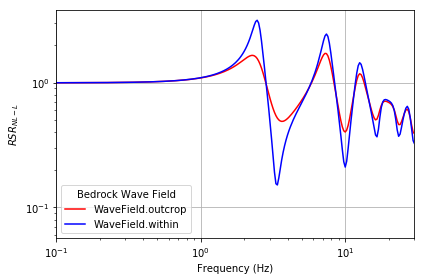

In [6]:
fig, ax = plt.subplots()

for (label, rsr), color in zip(rsrs.items(), ['red', 'blue']):
    ax.plot(motion.freqs, rsr, '-', color=color, label=label)

ax.set_xlabel('Frequency (Hz)')
ax.set_xscale('log')
ax.set_xlim(0.1, 30)

ax.set_ylabel('$RSR_{NL-L}$')
ax.set_yscale('log')

ax.grid()

ax.legend(loc='lower left', title='Bedrock Wave Field')

fig.tight_layout()
